# Project 1 - Reinforcement Learning - MO436

#### Group: 
* Arthur Guazzelli (234984)
* Elian Laura (265685)
* Iury Cleveston (230216)
* Maria Tejada (197488)

## 1) Environment Description

In this project, we used the FrozenLake $8\times8$ environment from OpenAi Gym. This environment is represented as a grid with $8\times8$ tiles, where the goal is to cross the entire board without falling into ice holes. Frozen Lake is an episodic environment, where the initial state (S) is in the top-left position, and the terminal states are either the ice holes (H) or the final goal in the bottom-right tile (G). The ice holes are spread across the board, and the agent should find a path to the goal through frozen tiles (F); the reward of value of $1$ is only given at this point.

<br>
<div>
<center><img src="frozenLake.png" width="180"/></center>
<center>Figure 1 - Frozen Lake Grid.</center>
</div>


The current state is represented as a single number corresponding to the tile where the agent has entered, ranging from $0$ to $63$; therefore, this environment is discrete and partial observable. The possible actions are moving north, east, south, and west. Frozen Lake is presented in a deterministic and stochastic way; the difference is in the slippery ice, where the agent might slip and move to one of the four directions.

The ice holes are close to feasible paths to the goal; also, the reward is delayed until the end. These characteristics make Frozen Lake a challenging environment, especially in the stochastic version, where the dynamics are unpredictable.

Codes are available at https://github.com/thurbridi/mo436-project-1

In [ ]:
import sys
sys.path.insert(0, '../src')

## 2) Monte Carlo Control (iury)

The Monte Carlo Agent was initialized with the state-action values $Q(s, a)$ equal to 0. We employed a step-size $\alpha_{t} = \frac{1}{N(s_{t},a_{t})}$, where $N(s_{t},a_{t})$ refers to the number of times action $a$ was selected from the state $s$.

The trade-off between exploration and exploitation was determined by an $\epsilon-greedy$ policy, where $\epsilon_{t} = \frac{N0}{N0+N(s_{t})}$; $N0$ is an hyperparameter, and $N(s_{t})$ is the number of times the state $s$ has been visited. 

In this project, we implemented two versions: tabular and linear approximation. Also, we searched for the best parameters using grid search, and we evaluated the solutions in the deterministic and stochastic environment.

The equation used for tabular Monte Carlo improvement is:

$Q(s,a) = Q(s,a) + \frac{1}{N(s,a)}(G_{t} - Q(s,a))$,

where $G_{t} = \sum \gamma^{T-1}R_{k,T}$, and $N(s,a) = N(s,a) + 1$

For policy evaluation, we used:

$\pi(s) = \mathrm{argmax} Q(s,a)$,

In [ ]:
from monte_carlo_tabular import *
from monte_carlo_approximator import *

### 2.1) Tabular & Deterministic

The first experiment consisted in applying the Monte Carlo First Visit in the tabular and deterministic environment. Therefore, we used a grid search technique to find the best solution given the parameters defined as:

$\mathrm{N0} \in [0.1, 1, 10]$,

$\mathrm{gamma} \in [1, 0.9, 0.5, 0.1]$,

$\mathrm{episodes} \in [100, 1000]$


In [ ]:
grid_search_tabular(stochastic=False)

      n0  gamma  episodes  win/loss (%)  elapsed time (s)
0    0.1    1.0     100.0         100.0          0.226304
1    1.0    1.0     100.0         100.0          0.189473
2   10.0    1.0     100.0           2.0          0.072398
3    0.1    0.9     100.0         100.0          0.126679
4    1.0    0.9     100.0         100.0          0.124684
5   10.0    0.9     100.0           2.0          0.089683
6    0.1    0.5     100.0         100.0          0.145805
7    1.0    0.5     100.0         100.0          0.095972
8   10.0    0.5     100.0           2.0          0.069440
9    0.1    0.1     100.0         100.0          0.108018
10   1.0    0.1     100.0         100.0          0.075810
11  10.0    0.1     100.0           2.0          0.064267
12   0.1    1.0    1000.0         100.0          0.421142
13   1.0    1.0    1000.0         100.0          0.392267
14  10.0    1.0    1000.0         100.0          1.148584
15   0.1    0.9    1000.0         100.0          0.294481
16   1.0    0.

In this experiment, we varied the $N0$, gamma, and episodes. The win/loss metric is defined as the percentage of wins from 100 games plays; the majority of executions returned 100\% of wins. Only the executions with $N0=10$ and with 100 episodes could not achieved maximum success, due to the excessive exploration. The elapsed time presented a consistent correlation with the number of episodes.

We selected the execution number 4 to be analyzed in detail as follows:

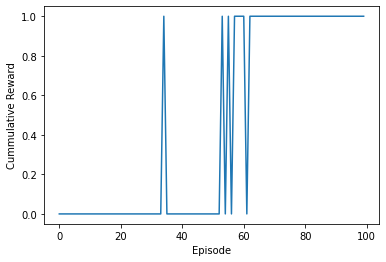

In [ ]:
Q, env = train_tabular(stochastic=False, episodes=100, gamma=0.9, n0=1)

The cumulative discounted reward (G) by episode increased during training; the average variance has also decreased, which means the agent is learning a good policy. The exploration rate is initially set as $N0=1$; however, as the training continues, the states are being visited, and the agent started to select greedy actions, contributing to the cumulative reward's variance decrease in the end. 

The final board is shown below, where the agent was able to reach its goal:

In [ ]:
env.render()

  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


We also reported the best state value ($V_*$) and the best policy ($\pi_*$), as follows:

In [ ]:
print_state_values_tabular(Q)


		 State Value
------------------------------------------------
 0.11| 0.14| 0.00| 0.22| 0.26| 0.30| 0.00| 0.00|
------------------------------------------------
 0.00| 0.14| 0.17| 0.20| 0.09| 0.37| 0.41| 0.04|
------------------------------------------------
 0.00| 0.03| 0.03| 0.00| 0.24| 0.05| 0.49| 0.56|
------------------------------------------------
 0.00| 0.00| 0.00| 0.00| 0.00| 0.00| 0.22| 0.60|
------------------------------------------------
 0.00| 0.00| 0.00| 0.00| 0.00| 0.00| 0.18| 0.74|
------------------------------------------------
 0.00| 0.00| 0.00| 0.00| 0.00| 0.00| 0.00| 0.86|
------------------------------------------------
 0.00| 0.00| 0.00| 0.00| 0.00| 0.00| 0.00| 1.00|
------------------------------------------------
 0.00| 0.00| 0.00| 0.00| 0.00| 0.00| 0.00| 0.00|
------------------------------------------------


In [ ]:
print_policy_tabular(Q)


		 Policy/Actions
------------------------------------------------
  r  |  s  |  r  |  r  |  r  |  s  |  l  |  s  |
------------------------------------------------
  r  |  r  |  r  |  n  |  s  |  r  |  s  |  r  |
------------------------------------------------
  s  |  r  |  n  |  l  |  r  |  r  |  r  |  s  |
------------------------------------------------
  n  |  s  |  r  |  l  |  l  |  n  |  s  |  s  |
------------------------------------------------
  n  |  r  |  s  |  l  |  r  |  r  |  r  |  s  |
------------------------------------------------
  s  |  n  |  r  |  l  |  n  |  l  |  s  |  s  |
------------------------------------------------
  r  |  l  |  n  |  s  |  n  |  r  |  l  |  s  |
------------------------------------------------
  l  |  s  |  s  |  r  |  s  |  l  |  l  |  n  |
------------------------------------------------


The policy is shown by state, where the greedy actions can be:
<ul>
    <li>n - north</li>
    <li>r - right</li>
    <li>s - south</li>
    <li>l - left</li>
</ul>

Observing the $V_*$ plot and the best policy $\pi_*$, we noted that the agent preferred to explore the top-right quadrant of the grid, mainly because the path seems less risky. In this sense, most of the actions are to go right and then south. The cumulative return (G) is appropriately assigned to the trajectory, being larger in the goal state, and decreasing its value until the initial state.

### 2.2) Tabular & Stochastic

The second experiment employed the same methodology as the first one. In this case, we turned on the environment slippery, which adds stochasticity. Similarly, we searched for the best solution using the grid search algorithm using the following parameters:

$\mathrm{N0} \in [1, 100, 1000, 10000]$,

$\mathrm{gamma} \in [1, 0.9, 0.1]$,

$\mathrm{episodes} \in [10000, 100000]$

This time we increased the number of episodes and the $N0$ constant to enable more exploration in the environment.

In [ ]:
grid_search_tabular(stochastic=True)

         n0  gamma  episodes  win/loss (%)  elapsed time (s)
0       1.0    1.0   10000.0           7.0          5.432594
1     100.0    1.0   10000.0          28.0          7.623629
2    1000.0    1.0   10000.0          55.0          9.491570
3   10000.0    1.0   10000.0          36.0         12.016099
4       1.0    0.9   10000.0           1.0          5.742304
5     100.0    0.9   10000.0          12.0          8.934242
6    1000.0    0.9   10000.0          43.0          9.263228
7   10000.0    0.9   10000.0           2.0         10.051708
8       1.0    0.1   10000.0           4.0          7.212385
9     100.0    0.1   10000.0           0.0          8.766804
10   1000.0    0.1   10000.0           1.0         11.912093
11  10000.0    0.1   10000.0           2.0          9.833791
12      1.0    1.0  100000.0          13.0         63.864103
13    100.0    1.0  100000.0          26.0         96.923429
14   1000.0    1.0  100000.0          60.0        128.208909
15  10000.0    1.0  1000

However, when the environment is stochastic, the agent has enormous difficulties in learning a good policy. Half of the executions returned a success rate inferior to 10\%. Nevertheless, the other executions were promising, especially the numbers 14 and 2, with win rates of 60\% and 55\%, respectively. The elapsed time has dramatically increased, primarily due to the increase in the number of episodes. The best solution was achieved by providing intermediate exploration with $N0=1000$. Also, the discount factor significantly impacted the win rate; the best results were achieved using a rate greater than 0.9.

Now, we will analyze the solution number 2:

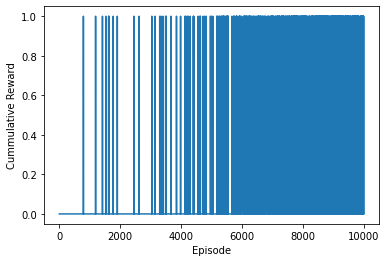

In [ ]:
Q, env = train_tabular(stochastic=True, episodes=10000, gamma=1, n0=1000)

The cumulative discounted reward has a large variance due to the stochasticity. However, the agent can reach the goal state most of the time; as the training proceeds, the agent retrieves more rewards. Due to the unknown dynamics, the agent falls into the ice holes more frequently, even when selecting the appropriate action, as shown below:

In [ ]:
env.render()

  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


Following our methodology, we plot the state value ($V_*$) and the derived policy $\pi_*$.

In [ ]:
print_state_values_tabular(Q)


		 State Value
------------------------------------------------
 0.05| 0.06| 0.06| 0.08| 0.08| 0.10| 0.14| 0.12|
------------------------------------------------
 0.05| 0.07| 0.06| 0.07| 0.08| 0.10| 0.11| 0.13|
------------------------------------------------
 0.02| 0.01| 0.02| 0.00| 0.05| 0.06| 0.14| 0.14|
------------------------------------------------
 0.01| 0.01| 0.00| 0.00| 0.01| 0.00| 0.14| 0.17|
------------------------------------------------
 0.00| 0.00| 0.00| 0.00| 0.01| 0.07| 0.15| 0.23|
------------------------------------------------
 0.01| 0.00| 0.00| 0.00| 0.00| 0.05| 0.00| 0.35|
------------------------------------------------
 0.00| 0.00| 0.00| 0.00| 0.00| 0.04| 0.00| 0.59|
------------------------------------------------
 0.00| 0.00| 0.00| 0.00| 0.25| 0.25| 0.50| 0.00|
------------------------------------------------


In [ ]:
print_policy_tabular(Q)


		 Policy/Actions
------------------------------------------------
  n  |  r  |  s  |  r  |  n  |  r  |  r  |  r  |
------------------------------------------------
  n  |  n  |  n  |  n  |  r  |  n  |  s  |  l  |
------------------------------------------------
  r  |  r  |  n  |  l  |  n  |  r  |  r  |  s  |
------------------------------------------------
  n  |  n  |  l  |  r  |  r  |  n  |  r  |  s  |
------------------------------------------------
  l  |  l  |  l  |  l  |  n  |  s  |  n  |  r  |
------------------------------------------------
  l  |  n  |  r  |  s  |  s  |  r  |  s  |  r  |
------------------------------------------------
  s  |  s  |  r  |  n  |  n  |  s  |  n  |  r  |
------------------------------------------------
  r  |  l  |  r  |  s  |  s  |  n  |  s  |  s  |
------------------------------------------------


The state value was properly determined; it increases as the agent approaches the goal state. However, a curious behavior has emerged; the agent attempts to stay close to the game's border most of the time. Also, the actions are chosen to exploit the stochastic dynamics of the environment, like going right instead of south. The policy makes the agent avoid the holes in the first place while expecting to reach the desired state through the game's stochasticity. Further, in the stochastic version, the agent has found alternative paths to the goal.

### 2.3) Linear Function Approximation & Deterministic

The third experiment consisted of applying a linear function approximator (LFA) to avoid a complete state representation. In this sense, we aim to generalize to unseen states by using a linear combination of features, given as:

$w = w + \alpha_{t}[(G_{t} - x(S)^Tw)x(S)]$

$x(S) = RBF(\mathrm{current\_state}, \mathrm{mod\_state})$

The feature vector is generated by extracting several features to represent the state, such as the current state number and the mod state, which is the current state divided by their column number (8, considering the grid size). Twenty Radial Basis Functions (RBF) are employed to represent the state space; for this, we sampled 3000 states from the environment and fit the feature function. Then we used a linear combination of them to generate the policy. We also tested with polynomial feature functions; however, it has not provided good results.

In [ ]:
grid_search_approximator(stochastic=False)

    alpha  gamma  eps  episodes  Total G Train  win/loss (%)  elapsed time (s)
0   0.100    1.0  0.9    1000.0     316.000000           0.0         36.047742
1   0.100    0.9  0.9    1000.0      39.957193           0.0         36.291694
2   0.100    0.1  0.9    1000.0       3.333333           0.0         33.191299
3   0.100    1.0  0.5    1000.0     438.000000           0.0         97.148110
4   0.100    0.9  0.5    1000.0      67.944745           0.0         66.153031
5   0.100    0.1  0.5    1000.0       5.555556           0.0         45.912886
6   0.100    1.0  0.1    1000.0     449.000000           0.0        214.719067
7   0.100    0.9  0.1    1000.0      77.002038           0.0        130.207591
8   0.100    0.1  0.1    1000.0       1.111111           0.0        242.903670
9   0.010    1.0  0.9    1000.0     338.000000           0.0         27.421843
10  0.010    0.9  0.9    1000.0      59.462351           0.0         24.824259
11  0.010    0.1  0.9    1000.0       3.333333      

The grid search has found a few executions with optimal policy, mainly those where alpha is 0.001. Also, the agent could only reach the goal with gamma greater than 0.9 and epsilon lower than 0.5. These parameters generate a policy that enables the agent to keep most of the reward through time and explore the policy more than explore the environment. We understand that the alpha and episodes play a significant role in the convergence since the agent requires more episodes to reach a reasonable solution when alpha is small. The time required to convergence is varied because sometimes the agent keeps executing inappropriate actions, which do not result in motion.

Another important metric is the accumulated reward during training. We noted that the agent could reach the goal during training and accumulate rewards many times; however, this does not always translate into a good policy. We hypothesize that the agent can accumulate reward by exploring the epsilon-greedy actions in training, but in the test, the agent gets stuck when only greedy actions are selected.  

We select one of our the best execution to analyse in detail, as shown:

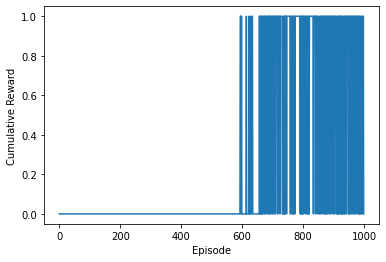

In [ ]:
Q, env = train_approximator(stochastic=False, episodes=1000, gamma=1, alpha=0.001, eps=0.1)

In [ ]:
play(env, Q)


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FF

Observing the cumulative reward plot shows that the agent is improving its policy since the accumulated reward increases as the training ends. The gameplay also confirmed that the agent could generalize an action-value function to determine the best policy in each state. To evaluate the policy numerically, we printed the state values and policy:

In [ ]:
print_state_values_approximator(env, Q)


		 State Value
------------------------------------------------
 0.5272| 0.6534| 0.7032| 0.7129| 0.7054| 0.6594| 0.5331| 0.5442|
------------------------------------------------
 0.5189| 0.6147| 0.6649| 0.6869| 0.6736| 0.5974| 0.5052| 0.7039|
------------------------------------------------
 0.4710| 0.5572| 0.5940| 0.5900| 0.5480| 0.4647| 0.6036| 0.7996|
------------------------------------------------
 0.4009| 0.4539| 0.4487| 0.4169| 0.3810| 0.3888| 0.6315| 0.8379|
------------------------------------------------
 0.2728| 0.2725| 0.2470| 0.2386| 0.2501| 0.3643| 0.6216| 0.8601|
------------------------------------------------
 0.0729| 0.0557| 0.0701| 0.1189| 0.1580| 0.3336| 0.6181| 0.8680|
------------------------------------------------
-0.0093|-0.0059| 0.0033| 0.0349| 0.1117| 0.3309| 0.6105| 0.8222|
------------------------------------------------
-0.0205|-0.0150|-0.0077| 0.0013| 0.1113| 0.3269| 0.5557| 0.7101|
------------------------------------------------


In [ ]:
print_policy_approximator(env, Q)


		 Policy/Actions
------------------------------------------------
  r  |  r  |  r  |  r  |  r  |  r  |  r  |  s  |
------------------------------------------------
  r  |  r  |  r  |  r  |  r  |  r  |  s  |  s  |
------------------------------------------------
  r  |  r  |  r  |  r  |  r  |  r  |  s  |  s  |
------------------------------------------------
  r  |  r  |  r  |  r  |  r  |  s  |  s  |  s  |
------------------------------------------------
  r  |  r  |  r  |  r  |  r  |  s  |  s  |  s  |
------------------------------------------------
  r  |  r  |  r  |  r  |  r  |  s  |  s  |  s  |
------------------------------------------------
  l  |  l  |  n  |  r  |  s  |  s  |  s  |  s  |
------------------------------------------------
  l  |  l  |  n  |  n  |  s  |  s  |  s  |  s  |
------------------------------------------------


The Monte Carlo Control with Linear Function Approximation (LFA) provided an optimal policy most of the time. Observing the best state values ($V_*$) and best policy ($\pi_*$), we noted that the agent can reach the goal following the learned policy. The greedy actions are only going right and then south, which is optimal. In this sense, the LFA generalized to unseen states.

### 2.4)  Linear Function Approximation & Stochastic

The last experiment with MC Linear Function Approximation is employed in the stochastic environment, and a grid search determines the best parameters. In this case, we also used an epsilon of 0.1 in the test to make the agent free of getting stuck; if only greedy actions are selected, the percentage of wins gets a maximum value of 6\%.

In [ ]:
grid_search_approximator(stochastic=True)

    alpha  gamma  eps  episodes  Total G Train  win/loss (%)  elapsed time (s)
0   0.010    1.0  0.5   10000.0     725.000000           0.0        654.040878
1   0.010    0.9  0.5   10000.0     325.896776           6.0        730.698742
2   0.010    0.1  0.5   10000.0      45.555556           0.0        812.738182
3   0.010    1.0  0.1   10000.0    4953.000000           0.0       1718.217440
4   0.010    0.9  0.1   10000.0     276.264654           0.0        958.625169
5   0.010    0.1  0.1   10000.0     147.777778           0.0       2177.223560
6   0.001    1.0  0.5   10000.0    7627.000000          48.0        587.652399
7   0.001    0.9  0.5   10000.0     295.219508           0.0        715.200193
8   0.001    0.1  0.5   10000.0      17.777778           0.0        724.436488
9   0.001    1.0  0.1   10000.0  126270.000000          20.0       8116.390173
10  0.001    0.9  0.1   10000.0    1408.655753           0.0       1096.665400
11  0.001    0.1  0.1   10000.0     147.777778      

The stochastic environment presented several nonlinearities, which made the solutions problematic. The best solution found in the test presented 48\% of wins, while most of them could not achieve any victory. The time for training also increased dramatically, probably due to the novel dynamics, which made the agent perform indefinitely actions that did not result in motion.

We selected the best solution to be analyzed in detail:

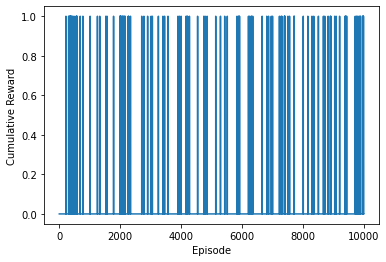

In [ ]:
Q, env = train_approximator(stochastic=True, episodes=10000, alpha=0.001, gamma=1, eps=0.5)

In [ ]:
env.render()

  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


In [ ]:
print_state_values_approximator(env, Q)


		 State Value
------------------------------------------------
 0.0496| 0.0664| 0.0690| 0.0727| 0.0788| 0.0815| 0.1033| 0.1289|
------------------------------------------------
 0.0556| 0.0679| 0.0644| 0.0731| 0.0783| 0.0943| 0.1308| 0.1756|
------------------------------------------------
 0.0523| 0.0575| 0.0515| 0.0604| 0.0741| 0.1112| 0.1749| 0.2419|
------------------------------------------------
 0.0355| 0.0400| 0.0396| 0.0445| 0.0708| 0.1291| 0.2172| 0.3030|
------------------------------------------------
 0.0124| 0.0239| 0.0316| 0.0372| 0.0680| 0.1454| 0.2530| 0.3507|
------------------------------------------------
-0.0082| 0.0095| 0.0206| 0.0249| 0.0669| 0.1604| 0.2780| 0.3743|
------------------------------------------------
-0.0267|-0.0091| 0.0033| 0.0099| 0.0696| 0.1712| 0.2837| 0.3648|
------------------------------------------------
-0.0465|-0.0306|-0.0135| 0.0013| 0.0729| 0.1696| 0.2635| 0.3233|
------------------------------------------------


In [ ]:
print_policy_approximator(env, Q)


		 Policy/Actions
------------------------------------------------
  n  |  n  |  n  |  r  |  r  |  r  |  l  |  l  |
------------------------------------------------
  n  |  n  |  n  |  r  |  r  |  r  |  r  |  r  |
------------------------------------------------
  n  |  n  |  n  |  r  |  r  |  r  |  r  |  r  |
------------------------------------------------
  n  |  n  |  n  |  r  |  r  |  r  |  r  |  r  |
------------------------------------------------
  n  |  n  |  n  |  n  |  r  |  r  |  r  |  r  |
------------------------------------------------
  n  |  n  |  n  |  n  |  r  |  r  |  r  |  r  |
------------------------------------------------
  n  |  n  |  n  |  n  |  r  |  r  |  r  |  r  |
------------------------------------------------
  n  |  n  |  n  |  s  |  r  |  r  |  r  |  r  |
------------------------------------------------


Similarly, when the environment is stochastic, the agent has much more difficulty executing the appropriate actions. In this case, the agent tries to hack the environment by staying close to the game's border in an attempt to avoid the ice holes. Also, the nonlinearities made the linear function approximation complex; although the RBF covered the whole grid, the linear combinations could not correctly assign the credits; some actions are not optimal. 

## 3) Q-learning ( Elian )

### Tabular deterministic Q-learning 

For this experiments the action-vale function was initialized to zero. The actions are chosen from the Q-table or with e-greedy scheduling through a exploration probability (epsilon) that is updated through a exponential decay formula  en each episode, this probability is compared with a random float. If the random float is less than the exploration probability the agent selects arandom action else he exploits his knowledge using the bellman equation .

The Q-learning function updates the Q-table, it depends of a learning rate and a gamma value. For this experiments section were used#

learning_rate = 0.001

gamma = 0.95


### Tabular stochastic Q-learning 

Using q-learning in stochastic mode has the same parameters employed deterministic version. In this case, we turned on the environment slippery, which adds stochasticity. 

### Q-learning with linear function approximation

In this experiment we are applying a linear function approximator (LFA) to avoid a complete state representation. In this sense, we aim to generalize to unseen states by using a linear combination of features that are functions of states and actions, in this way we find Q-values. This means in the linear function regime we have:

$Q(s,a) = \theta_0 \cdot 1 + \theta_1 \phi_1(s,a) + \cdots + \theta_n\phi_n(s, a) + b = \theta^T\phi(s,a) + b$

We add a bias term, it is  necessary to properly scale the function values independently of the features.

To make the distinction between different actions explicit the features for state-action pair (s,a_i) was encoded with respect to the position coordinates  of the actual sate-action and the neighboors positions.

The weights update procedure is through the computation of the gradient with a loss function defined as: 

$L(\theta^{(i)}) = \frac{1}{2}(Q^+(s,a) - Q(s,a))^2 = \frac{1}{2}(Q^+(s,a) -
\phi(s,a)^T\theta^{(i)})^2$


The weight update procedure is: 

\begin{align}
\theta^{(i+1)} &= \theta^{(i)} - \alpha \nabla L(\theta^{(i)}) \\
&= \theta^{(i)} - \alpha \nabla \frac{1}{2}[Q^+(s,a) - \phi(s,a)^T\theta^{(i)}]^2 \\
&= \theta^{(i)} - \alpha (Q^+(s,a) - \phi(s,a)^T\theta^{(i)}) \cdot \phi(s,a)
\end{align}




In the next subsections we can see the results of the q-learning using linear function approximation in determinist and stochastic mode.

####  Deterministic mode

In order to find the best set of parameter values we use a gridSearch, the next is the table with the sets and total wins.

In [ ]:
grid_search_approximator(stochastic=False)

,c,learning_rate,gamma,epsilon,momentum,win/loss (%),elapsed time (s)
0,0,0.100,0.85,0.5,0.5,0.0,0 days 00:00:00.014840
1,1,0.100,0.85,0.5,0.7,0.0,0 days 00:00:00.023185
2,2,0.100,0.85,0.5,0.9,0.0,0 days 00:00:00.022127
3,3,0.010,0.85,0.5,0.5,0.0,0 days 00:00:00.019625
4,4,0.010,0.85,0.5,0.7,0.0,0 days 00:00:00.019334
5,5,0.010,0.85,0.5,0.9,0.0,0 days 00:00:00.021929
6,6,0.001,0.85,0.5,0.5,0.0,0 days 00:00:00.021468
8,8,0.001,0.85,0.5,0.9,1.0,0 days 00:00:00.009778
9,9,0.100,0.90,0.5,0.5,0.0,0 days 00:00:00.021756
10,10,0.100,0.90,0.5,0.7,1.0,0 days 00:00:00.022059


####  Stochastic mode

## 4) SARSA(λ) - (Maria e Arthur)

### Elegibility Traces

The first term to be clear about is the **eligibility trace** that unifies the temporal-difference (TD) and Monte Carlo (MC) methods, in addition to offering the advantages over the $n$-steps TD methods. The trace-decay parameter $\lambda \in [0,1]$, common to methods that use eleigility traces, controls the rate at which the traces vanish. 
When $\lambda=1$ the algorithm functions like Monte Carlo, while at $\lambda=0$ the algorithm functions like one-step TD methods. The benefits over $n$-steps methos are:

1. Only a single trace vector must be kept in memory instead of $n$ feature vectors
2. Learning can take place immediately after executing an action instead of being delayed for $n$ steps.

Most TD methods can make use of eleigibility traces to obtain the advantes mentioned above. The $\lambda$-return:

<br><center>
$G_t^{\lambda} = (1-\lambda) \sum_{n=1}^{\infty} \lambda^{n-1} G_{t:t+n}$
</center>

### Difference between Q-learning and SARSA

Q-learning has a close relative called SARSA (for State-Action-Reward-State-Action). The update rule for SARSA is:


<br><center>
$Q(s,a) = Q(s,a) + \alpha(R(s) + \gamma Q(s', a') - Q(s,a))$,
</center>
    
where $a'$ is the action actually taken in state $s'$. The rule is applied at the end of each $s, a, r, s', a'$. 

The difference from Q-learning is quite subtle: whereas Q-learning backs up the best Q-values from the state reached in the observed transition, SARSA waits until an action is actually taken and backs up the Q-value for that action. Now, for a greedy agent that always takes the action with best Q-value, the two algorithms are identical. When exploration is happening however, they differ significantly. Because Q-learning uses the best Q-value, it pays no attention to the actual policy being followed - it is an **off-policy** learning algorithm, whereas SARSA is an **on-policy** algorithm. 

The idea in Sarsa($\lambda$) is to apply the TD($\lambda$) prediction method to state-action pairs rather than to states. Obviously, then, we need a trace not just for each state, but for each state-action pair. Let $e_t(s,a)$ denote the trace for state-action pair $s,a$. Otherwise, the method is just TD($\lambda$), substituting state-action variables for estate variables $Q(s,a)$ for $V(s)$ and $e_t(s,a)$ for $e_t(s)$:

<br><center>
$Q_{t+1}(s,a) = Q_t(s,a) + \alpha \delta_t e_t(s,a)$
</center>
    
where

$\delta_t = r_{t+1} + \gamma Q_t(s_{t+1}, a_{t+1}) - Q_t(s_t, a_t)$

There are two methods of $e_t$: accumulate and replace. The first version is:

<br><center>
$e_t(s,a) =
  \begin{cases}
    \gamma \lambda e_{t-1}(s,a) + 1  & \quad \text{if } s=s_t \text{ and } a= a_t\\
    \gamma \lambda e_{t-1}(s,a)      & \quad \text{otherwise}
  \end{cases}
$
</center>

The replace method is given by:

<br><center>
$e_t(s,a) =
  \begin{cases}
    1  & \quad \text{if } s=s_t \text{ and } a= a_t\\
    \gamma \lambda e_{t-1}(s,a) & \quad \text{otherwise}
  \end{cases}
$
</center>

For this project we have made a tabular and function approximation versions.  

### Approximation Linear Function

Sarsa($\lambda$) has different versions of the algorithm. For this assignment, we chose to implement *True online Sarsa($\lambda$)* that is described in [p. 307 Reinforcement Learning: An Introduction]

The algorithm description specifies that the feature vector $\mathbb{x}$ is given by a function in the form 

$$\mathbb{x}: S^+ \times \mathcal{A} \rightarrow \mathcal{R}^d$$

Each of us (Maria and Arthur) came up with a different way of representing the features for the approximation function.

The first way of the features is determined by the discretication of a vector with $128$ positions in binary. In which the first $64$ positions correspond to the state that is currently. And the next $64$ positions are the next state that is determined by the action that is passed in the function.

The second way depends on the extraction of the row and column of the position based on the current state and the next state simulated by the given action. These values are then combined into polynomials that are used as the feature vector. Normalization based on the grid size was also applied to keep the gradients from exploding. 
The final polynomial used for the current state (after extracting the row and column index, row, col) was:

<br><center>
$[\text{row}_i,\; \text{col}_i,\; \text{row}_i*\text{col}_i,\; \text{row}_i^2,\; \text{col}_i^2,\; \text{row}_i^3,\; \text{col}_i^3,\; \text{row}_i^4,\; \text{col}_i^4]$
</center>

The full feature vector is the sum of the polynomial for the current state; the same polynomial but for the the next state based on the action; and a bias term. The array total is $19$ features, this makes for a representation that is much more memory efficient than the tabular implementation. 

We note that this approach hard-coded environment dynamics into the features

In [ ]:
from sarsa_lambda import *
from sarsa_lambda_approx import *
from sarsa_lambda_approx2 import *

### 4.1) Tabular & Deterministic

The first experiment consisted in applying the SARSA($\lambda$) in the tabular version and deterministic environment. Therefore, we used a grid search techniques to find the best solution given the parameters defined as:

* $\text{episode} \in [1000, 5000]$,
* $\gamma \in [0.99]$,
* $\alpha \in [0.01]$,
* $\lambda \in [0.01, 0.5, 0.9, 1.0]$,
* $\epsilon \in [0.01, 0.05, 1.0]$,
* method: accumulate or replace.


In [ ]:
report_sarsa(stochastic = False)

/home/marta2/Downloads/mo436-project-1/notebooks/../src/sarsa_lambda.py:82: RuntimeWarning: overflow encountered in double_scalars
  delta = reward + discount*Q[next_state][next_action] - Q[state][action]
/home/marta2/Downloads/mo436-project-1/notebooks/../src/sarsa_lambda.py:88: RuntimeWarning: invalid value encountered in multiply
  Q[s][:] += alpha * delta * E[s][:]


,episodes,gamma,alpha,lambda,epsilon,type,win/loss (%),elapsed time (s)
0,1000,0.99,0.01,0.0,0.01,accumulate,99.0,15.531965
1,1000,0.99,0.01,0.0,0.01,replace,0.0,46.984160
2,1000,0.99,0.01,0.5,0.01,accumulate,100.0,8.389721
3,1000,0.99,0.01,0.5,0.01,replace,99.0,9.319530
4,1000,0.99,0.01,0.9,0.01,accumulate,100.0,20.262969
5,1000,0.99,0.01,0.9,0.01,replace,98.0,6.940933
6,1000,0.99,0.01,1.0,0.01,accumulate,0.0,29.145828
7,1000,0.99,0.01,1.0,0.01,replace,97.0,13.450243
8,1000,0.99,0.01,0.0,0.05,accumulate,92.0,29.343748
9,1000,0.99,0.01,0.0,0.05,replace,0.0,24.052486


In this experiment, we vary $\lambda$, $\epsilon$, episode, and method type. The win/loss metric is defined as the winning percentage of 100 games played; most executions returned a great $90\%$ win value. We observe that the worst results are with the replaced type and $\lambda$ close to 0.

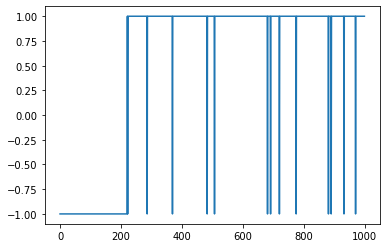

In [ ]:
env = gym.make('FrozenLake8x8-v1', is_slippery=False)
Q_sarsa, E_sarsa, stats, _ = sarsa_lambda(env, 1000, 0.99, 0.01, 0.5, 0.01, 'accumulate')
plt.plot(stats)
plt.show()

The reward is shown between $-1$ to $1$. It is given a positive reward when it reaches the goal, if on the other hand it fell into a hole, then it will have a punishment. This image shows the reward for the 1000 training episodes. We observe that most of them have a positive reward.

In [ ]:
generate_stats_sarsa(env, Q_sarsa, E_sarsa, 1, 0.99, 0.01, 0.5, 0.01, 'accumulate', True)

  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Left)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFF

1.0

The report of the te best state value and the best policy, as follows:

In [ ]:
print_state_values_sarsa(Q_sarsa)


			 State Value
--------------------------------------------------------
  0.36|  0.41| -0.01| -0.02|  0.72|  0.77| -0.00| -0.02|
--------------------------------------------------------
 -0.03|  0.47|  0.53|  0.60|  0.66|  0.81|  0.86| -0.01|
--------------------------------------------------------
 -0.02| -0.01| -0.03|  0.00| -0.01| -0.00|  0.90| -0.01|
--------------------------------------------------------
 -0.04| -0.03| -0.04| -0.03| -0.02|  0.00|  0.95|  0.04|
--------------------------------------------------------
 -0.03| -0.03| -0.03|  0.00| -0.01| -0.01|  0.98|  1.00|
--------------------------------------------------------
 -0.03|  0.00|  0.00|  0.00| -0.00| -0.00|  0.00|  1.02|
--------------------------------------------------------
 -0.01|  0.00|  0.00|  0.00|  0.00|  0.00|  0.00|  1.04|
--------------------------------------------------------
 -0.01|  0.00|  0.00|  0.00|  0.00|  0.00|  0.00|  0.00|
--------------------------------------------------------


In [ ]:
print_policy_sarsa(Q_sarsa)


		 Policy/Actions
------------------------------------------------
  →  |  ↓  |  ←  |  ←  |  →  |  ↓  |  ←  |  ←  |
------------------------------------------------
  ↓  |  →  |  →  |  →  |  ↑  |  →  |  ↓  |  ←  |
------------------------------------------------
  →  |  ↑  |  ←  |  ←  |  →  |  →  |  ↓  |  ↓  |
------------------------------------------------
  ↑  |  ↑  |  ←  |  →  |  ↓  |  ←  |  ↓  |  ↓  |
------------------------------------------------
  ↑  |  ←  |  ←  |  ←  |  →  |  ↓  |  →  |  ↓  |
------------------------------------------------
  ↓  |  ←  |  ←  |  ↓  |  →  |  ↑  |  ←  |  ↓  |
------------------------------------------------
  ↑  |  ←  |  ←  |  ←  |  ←  |  →  |  ←  |  ↓  |
------------------------------------------------
  →  |  ↓  |  ←  |  ←  |  ↓  |  ↓  |  ←  |  ←  |
------------------------------------------------


It is observed that the most productive path is to go all the way to the right and then go down. And we observe in most of the ways it is to go one of the edges and then go to the right and down.

### 4.2) Tabular & Stochastic

The first experiment consisted in applying the SARSA($\lambda$) in the tabular version and deterministic environment. Therefore, we used a grid search techniques to find the best solution given the parameters defined as:

* $\text{episode} \in [1000, 5000]$,
* $\gamma \in [0.99]$,
* $\alpha \in [0.01]$,
* $\lambda \in [0.01, 0.5, 0.9, 1.0]$,
* $\epsilon \in [0.01, 0.05, 1.0]$,
* method: accumulate or replace.

In [ ]:
report_sarsa(stochastic = True)

,episodes,gamma,alpha,lambda,epsilon,type,win/loss (%),elapsed time (s)
0,1000,0.99,0.01,0.01,0.01,accumulate,32.0,35.823933
1,1000,0.99,0.01,0.01,0.01,replace,0.0,22.258200
2,1000,0.99,0.01,0.50,0.01,accumulate,64.0,36.563314
3,1000,0.99,0.01,0.50,0.01,replace,8.0,28.171000
4,1000,0.99,0.01,0.90,0.01,accumulate,58.0,28.701306
5,1000,0.99,0.01,0.90,0.01,replace,35.0,28.099315
6,1000,0.99,0.01,1.00,0.01,accumulate,0.0,13.269087
7,1000,0.99,0.01,1.00,0.01,replace,43.0,31.653745
8,1000,0.99,0.01,0.01,0.05,accumulate,19.0,37.123757
9,1000,0.99,0.01,0.01,0.05,replace,0.0,18.582086


In this experiment, we vary $\lambda$, $\epsilon$, episode, and method type. The win/loss metric is defines as the percentage of wins from 100 games plays; the majority of wins is $78.0\%$, with this parameters:

* $\text{episode} \in [5000]$,
* $\gamma \in [0.99]$,
* $\alpha \in [0.01]$,
* $\lambda \in [0.50]$,
* $\epsilon \in [0.05]$,
* method: accumulate

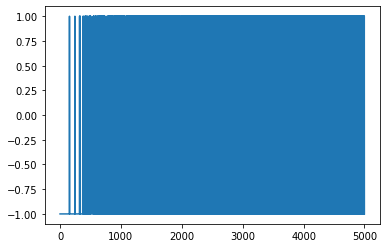

In [ ]:
env = gym.make('FrozenLake8x8-v1', is_slippery=True)
Q_ssarsa, E_ssarsa, stats, _ = sarsa_lambda(env, 5000, 0.99, 0.01, 0.5, 0.05, 'accumulate')
plt.plot(stats)
plt.show()

The reward is shown between $-1$ to $1$. It is given a positive reward when it reaches the goal, if on the other hand it fell into a hole, then it will have a punishment. This image shows the reward for the 5000 training episodes. We observe that most of them have a positive reward.

The report of the te best state value and the best policy, as follows:

In [ ]:
generate_stats_sarsa(env, Q_ssarsa, E_ssarsa, 1, 0.99, 0.01, 0.5, 0.05, 'accumulate', True)

  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
F

1.0

In [ ]:
print_state_values_sarsa(Q_ssarsa)


			 State Value
--------------------------------------------------------
  0.03|  0.03|  0.06|  0.08|  0.11|  0.14|  0.21|  0.24|
--------------------------------------------------------
  0.03|  0.03|  0.04|  0.06|  0.09|  0.14|  0.20|  0.25|
--------------------------------------------------------
 -0.03| -0.04| -0.08|  0.00| -0.05|  0.07|  0.16|  0.28|
--------------------------------------------------------
 -0.09| -0.12| -0.22| -0.43| -0.26|  0.00|  0.21|  0.32|
--------------------------------------------------------
 -0.13| -0.23| -0.37|  0.00| -0.22| -0.09|  0.17|  0.40|
--------------------------------------------------------
 -0.14|  0.00|  0.00| -0.14| -0.21| -0.20|  0.00|  0.56|
--------------------------------------------------------
 -0.11|  0.00| -0.05| -0.04|  0.00| -0.12|  0.00|  0.78|
--------------------------------------------------------
 -0.07| -0.09| -0.07|  0.00| -0.02| -0.02|  0.00|  0.00|
--------------------------------------------------------


In [ ]:
print_policy_sarsa(Q_ssarsa)


		 Policy/Actions
------------------------------------------------
  →  |  ↓  |  →  |  →  |  ↑  |  ↓  |  →  |  →  |
------------------------------------------------
  ↑  |  ↑  |  ↑  |  ↑  |  ↑  |  →  |  ↑  |  →  |
------------------------------------------------
  ↑  |  ↑  |  ←  |  ←  |  →  |  ↑  |  ↓  |  →  |
------------------------------------------------
  ↑  |  ↑  |  ↑  |  ↑  |  ←  |  ←  |  →  |  →  |
------------------------------------------------
  ←  |  ↑  |  →  |  ←  |  →  |  ↓  |  ↑  |  →  |
------------------------------------------------
  ←  |  ←  |  ←  |  →  |  ↓  |  ←  |  ←  |  →  |
------------------------------------------------
  →  |  ←  |  ←  |  ↑  |  ←  |  ←  |  ←  |  →  |
------------------------------------------------
  ←  |  ↑  |  ↓  |  ←  |  →  |  →  |  →  |  ←  |
------------------------------------------------


### 4.3) Linear Function Approximation & Deterministic


#### 4.3.1) First version (128 features)

A binary discretization of the current state was performed and through the action the state for that action is chosen. So it was tested:
    
* $\text{episode} \in [15000, 20000]$,
* $\gamma \in [0.99]$,
* $\alpha \in [0.001, 0.01, 0.1]$,
* $\lambda \in [0.01, 0.5, 0.9, 1.0]$,
* $\epsilon \in [0.01]$.

In [ ]:
report_sarsa_approx(False)

,episodes,gamma,alpha,lambda,epsilon,win/loss (%),elapsed time (s)
0,15000.0,0.99,0.001,0.01,0.01,98.0,33.800815
1,15000.0,0.99,0.001,0.50,0.01,98.0,32.709157
2,15000.0,0.99,0.001,0.90,0.01,100.0,32.868252
3,15000.0,0.99,0.001,1.00,0.01,98.0,30.832365
4,20000.0,0.99,0.001,0.01,0.01,99.0,42.008074
5,20000.0,0.99,0.001,0.50,0.01,98.0,39.952675
6,20000.0,0.99,0.001,0.90,0.01,97.0,40.748318
7,20000.0,0.99,0.001,1.00,0.01,99.0,40.821783
8,15000.0,0.99,0.010,0.01,0.01,96.0,33.965552
9,15000.0,0.99,0.010,0.50,0.01,98.0,35.815818


It is observed that it has greater loss when the learning rate ($\alpha$) is at $0.1$. On the other hand, we have quite a bit of convergence when $\alpha$ is very small.

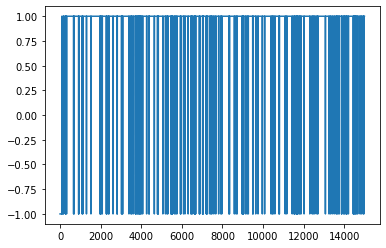

In [ ]:
env = gym.make('FrozenLake8x8-v1', is_slippery=False)
w_dlfsarsa, stats = sarsa_lambda_approx(env, 15000, 0.99, 0.001, 0.9, 0.01)
plt.plot(stats)
plt.show()

In [ ]:
generate_stats_sarsa_approx(env, w_dlfsarsa, 1, 0.99, 0.001, 0.9, 0.01, True)

  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Left)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFF

1.0

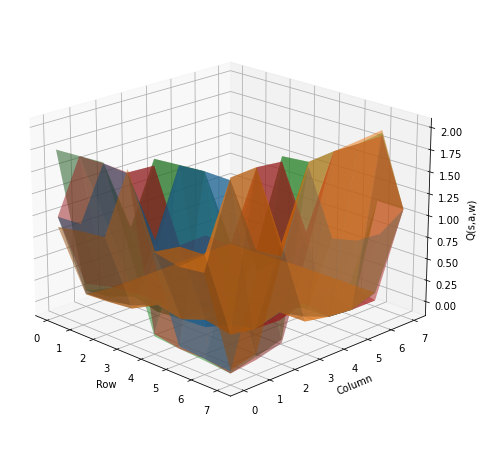

<Figure size 432x288 with 0 Axes>

In [ ]:
draw_feature_sarsa_lambda_approx(env, w_dlfsarsa)

#### 4.3.2) Second version (19 features)

Using the polynomial feature vector described above, we train the reinforcement learning agent with every combination of the following parameters:

$\epsilon \in \{ 0.01 \}$

$\alpha \in \{ 0.1, 0.001, 0.00001 \}$

$\gamma \in \{ 1.0 \}$

$\lambda \in \{ 0, 0.4, 0.6, 1 \}$

$\text{episodes} \in \{1000, 2000\}$

After training, we test the agent by running a greedy policy ($\epsilon=0$) on the resulting action-value function for 100 episodes. For the deterministic environment, this results in either the agent winning (reaching the goal) or losing (falling into a hole) in every episode. The search space of parameters we used resulted in most of the agents learning a action-value function that was able to navigate the frozen lake.

In [ ]:
report_sarsa_approx2(stochastic=False)

,episodes,gamma,alpha,lambda,epsilon,win/loss (%),elapsed time (s)
0,1500.0,1.0,0.10000,0.0,0.01,100.0,4.975080
1,1500.0,1.0,0.10000,0.4,0.01,0.0,15.715720
2,1500.0,1.0,0.10000,0.6,0.01,0.0,17.991075
3,1500.0,1.0,0.10000,1.0,0.01,0.0,15.735779
4,2000.0,1.0,0.10000,0.0,0.01,100.0,8.518509
5,2000.0,1.0,0.10000,0.4,0.01,100.0,22.088184
6,2000.0,1.0,0.10000,0.6,0.01,0.0,22.964663
7,2000.0,1.0,0.10000,1.0,0.01,0.0,22.607483
8,1500.0,1.0,0.00100,0.0,0.01,100.0,3.661714
9,1500.0,1.0,0.00100,0.4,0.01,100.0,3.674088


For the deterministic, we observe multiple configurations obtained found the optimal policy. To go into details, we train one such configuration again to obtain the model parameters.

In [ ]:
env = gym.make('FrozenLake8x8-v1', is_slippery=False)
# Reset the seed
np.random.seed(42)
random.seed(42)
env.seed(42)

w_dlfsarsa2, stats = sarsa_lambda_approx2(env, 1500, alpha=1e-1, epsilon=0.01, discount=1.0, trace_decay=0.0)

The plot below shows the training performance for this agent in terms of the reward obtained in each episode. After reaching the goal around the 700th episode, the agent immediately starts to perform wins more consistently. Recall that this environment only gives a reward different than 0 when the goal is reached. So, even though more than 600 episodes had passed, the weights remained unchanged until that first win.

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=stats))
fig.update_layout(title='Training',
                   xaxis_title='Episode',
                   yaxis_title='Return')

If we plot the action-value function for every state and action, we see that the features create a smooth curve where the maximum value is at the goal for all actions. On the deterministic environment, the action for going right dominates the state space with the highest value, the one exception being column 7 where the 'down' action is preferred. The resulting strategy following a greedy policy is that the agent goes right until it reaches column 7 and then proceeds to go down towards the goal.

In [ ]:
plot_action_value_plotly(w_dlfsarsa2, title='Action-value function on deterministic environment')

### 4.4) Linear Function Approximation & Stochastic


#### 4.4.1) First version (128 features)

A binary discretization of the current state was performed and through the action the state for that action is chosen. So it was tested:
    
* $\text{episode} \in [15000, 20000]$,
* $\gamma \in [0.99]$,
* $\alpha \in [0.001, 0.01, 0.1]$,
* $\lambda \in [0.01, 0.5, 0.9, 1.0]$,
* $\epsilon \in [0.01]$.


In [ ]:
report_sarsa_approx(True)

,episodes,gamma,alpha,lambda,epsilon,win/loss (%),elapsed time (s)
0,15000.0,0.99,0.001,0.01,0.01,54.0,270.128492
1,15000.0,0.99,0.001,0.50,0.01,83.0,218.299809
2,15000.0,0.99,0.001,0.90,0.01,69.0,226.250795
3,15000.0,0.99,0.001,1.00,0.01,79.0,186.460935
4,20000.0,0.99,0.001,0.01,0.01,48.0,344.313794
5,20000.0,0.99,0.001,0.50,0.01,81.0,300.322588
6,20000.0,0.99,0.001,0.90,0.01,75.0,313.826838
7,20000.0,0.99,0.001,1.00,0.01,74.0,263.719175
8,15000.0,0.99,0.010,0.01,0.01,76.0,177.484497
9,15000.0,0.99,0.010,0.50,0.01,83.0,222.260945


In this experiment, we vary $\lambda$, $\epsilon$, episode, and method type. The win/loss metric is defines as the percentage of wins from 100 games plays; the majority of wins is $85.0\%$, with this parameters:

* $\text{episode} \in [20000]$,
* $\gamma \in [0.99]$,
* $\alpha \in [0.01]$,
* $\lambda \in [0.50]$,
* $\epsilon \in [0.01]$.

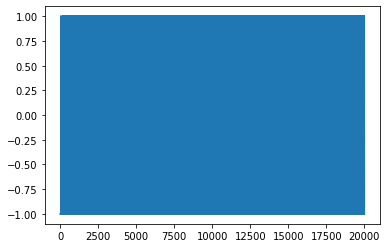

In [ ]:
env = gym.make('FrozenLake8x8-v1', is_slippery=True)
w_slfsarsa, stats = sarsa_lambda_approx(env, 20000, 0.99, 0.010, 0.50, 0.01)
plt.plot(stats)
plt.show()

In [ ]:
generate_stats_sarsa_approx(env, w_slfsarsa, 1, 0.99, 0.010, 0.50, 0.01, True)

  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
F

1.0

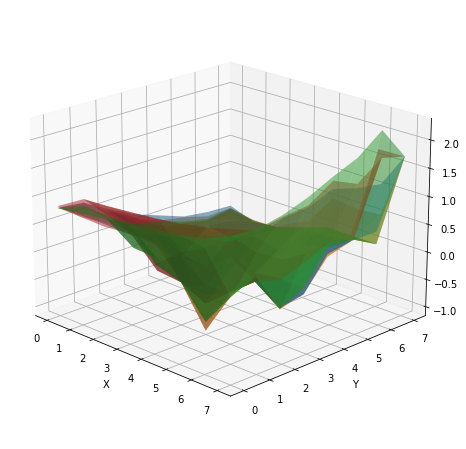

<Figure size 432x288 with 0 Axes>

In [ ]:
draw_feature_sarsa_lambda_approx(env, w_slfsarsa)

#### 4.4.2) Second version (19 features)

Now the ice of the frozen lake is slippery, and taking a step might not get you to where you expected. 

Since the stochastic environment by definition takes a random action with probability $p$, we decided to train the agent with a strictly greedy policy ($\epsilon=0$), leaving exploration to the intrinsic randomness of the environment. Following the same training procedure from before, we test the following parameters

$\epsilon \in \{ 0 \}$

$\alpha \in \{ 0.1, 0.001, 0.00001 \}$

$\gamma \in \{ 1.0 \}$

$\lambda \in \{ 0, 0.4, 0.6, 1 \}$

$\text{episodes} \in \{1000, 2000\}$

And the results are a complete disaster. The best agent got to the frisbee only 7 out of 100 tries.

In [ ]:
report_sarsa_approx2(stochastic=True)

,episodes,gamma,alpha,lambda,epsilon,win/loss (%),elapsed time (s)
0,1500.0,1.0,0.10000,0.0,0.0,0.0,5.437170
1,1500.0,1.0,0.10000,0.4,0.0,0.0,5.658954
2,1500.0,1.0,0.10000,0.6,0.0,0.0,5.377340
3,1500.0,1.0,0.10000,1.0,0.0,0.0,5.998575
4,2000.0,1.0,0.10000,0.0,0.0,0.0,6.979698
5,2000.0,1.0,0.10000,0.4,0.0,6.0,6.884259
6,2000.0,1.0,0.10000,0.6,0.0,6.0,7.898205
7,2000.0,1.0,0.10000,1.0,0.0,0.0,7.858244
8,1500.0,1.0,0.00100,0.0,0.0,0.0,5.509722
9,1500.0,1.0,0.00100,0.4,0.0,0.0,5.540315


As before, we use the best parameters train the agent again and explore what happened.

In [ ]:
env = gym.make('FrozenLake8x8-v1', is_slippery=True)
# Reset the seed
np.random.seed(42)
random.seed(42)
env.seed(42)

w_slfsarsa2, stats = sarsa_lambda_approx2(
        env, 2000, alpha=1e-3, epsilon=0, discount=1.0, trace_decay=0.6)

The training rewards show that the agent only reached the goal by the end training. On the deterministic environment, a single win was enough to lead the agent to consistent wins, but we don't see that here (even with extended episodes).

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=stats))
fig.update_layout(title='Training',
                   xaxis_title='Episode',
                   yaxis_title='Return')

If we plot the action-value function we note that it is very similar to the deterministic case, and that is a bad thing. With the slippery ice, the best strategy is to keep far from the holes while still making progress towards the frisbee. This narrows the states that should have higher value, and we expect that such a smooth curve doesn't capture these narrow paths in the state space. What this means is that we need a more complex model to represent the action-value function, or a much more intricate feature vector that is laborous to engineer.

In [ ]:
plot_action_value_plotly(w_slfsarsa2, title='Action-value function on stochastic environment')

## 5. Discussion

We considered that bootstrapping presented benefits considering that the problem is strictly markovian. In this case, the training is faster. The disadvantage is that bootstrapping generates a biased estimator, which ends up propagating errors. Comparing the results in the tabular version, bootstrapping improved the winning metric by around $13\%$. Also, bootstrapping in MC compared to with Sarsa ($\lambda$) decreased the number of episodes necessary to converge to an optimal policy, from $100.000$ to $5.000$ episodes, respectively. For Sarsa($\lambda$), the best $\lambda$ was around $0.5$, which suggests a good tradeoff between MC and TD methods.


The reward is delayed and therefore makes the training slower; the agent fails much more. However, we were able to achieve the optimal policy given the reward function. In the Sarsa ($\lambda$) tabular, we add the punishment of $-1$, when the agent was dropped into a ice hole, which the results of the stochastic environment were improved. 


Function approximation had various effects depending on the features that were used, since every method used a linear approximator. One benefit of linear functions approximations is the lower memory consumption compared to tabular methods. However, linear functions might not be able to represent the environment's dynamic required for an optimal policy, which can be attenuated by increasing the number of combinations (weights). Another disadvantage of using function approximators is that feature engineering is a laborious process that can require problem specific knowledge in order to produce good results. In some cases, we had to introduce domain knowledge, such as the number of lines and columns of the grid, in order to be able to achieve reasonable solutions.


The deterministic environment in the three algorithms, it was observed that the results are better than the stochastic environment. For example, in the MC tabular deterministic it reached $100\%$, and decrease in the stochastic $60\%$. Other example, Sarsa($\lambda$) the same behavior of the MC is also observed. We concluded that it was more difficult to work with a stochastic environment. The stochastics environment presented much more nonlinearities than the deterministic environment, which imposes a great challenge to the linear function approximations.


